## Imports, Variables and Connect to Reddit API

In [2]:
#imports and variables
import datetime
import praw
import csv
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from credentials import p_id, p_agent, p_secret, p_pass

total_post_limit = 5000
last_n_days = 19
today = datetime.date.today().day

sub_name = 'Stocks'
csv_file = 'reddit_posts.csv'
data_folder = 'data/'

In [3]:
#connect to reddit API
#check authentication
#select subreddit

reddit = praw.Reddit(
    client_id=p_id,
    client_secret=p_secret,
    password=p_pass,
    user_agent='scrapper_bot',
    username=p_agent,
)

print(reddit.read_only)
print(reddit.user.me())


# Subreddit to search
subreddit = reddit.subreddit(sub_name) 

#define date helper funciton
#function to return date of post
def get_date(submission):
    time = submission.created
    return datetime.datetime.fromtimestamp(time)

False
Adopolis23


## Get data from Reddit

In [4]:
days_mentions = {}
terms_of_interest = ['TSLA', 'Tesla', 'TESLA']
dates_to_save = np.arange(today, today-last_n_days, -1)
dates_to_save

array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2])

In [5]:
#for each post in the subreddit
for submission in subreddit.new(limit=total_post_limit):

    #make sure it is on one of the days we are checking
    if get_date(submission).day not in dates_to_save:
        break
    if get_date(submission).day not in days_mentions:
        days_mentions[get_date(submission).day] = 0



    #get the total text of the post
    total_text = submission.title + ' ' + submission.selftext
    
    mention_count = 0

    #for each word check if TOI and then count
    for word in total_text.split():
        word = word.replace('.', '')
        word = word.replace(',', '')
        word = word.replace('?', '')
        
        if word in terms_of_interest:
            mention_count = mention_count+1

    #if(mention_count != 0):
        #print(submission.title)

    #add count to total count for that day
    days_mentions[get_date(submission).day] = days_mentions[get_date(submission).day] + mention_count 
    

        


In [6]:
days_mentions

{20: 2,
 19: 0,
 18: 0,
 17: 7,
 16: 0,
 15: 0,
 14: 4,
 13: 33,
 12: 17,
 11: 5,
 10: 7,
 9: 7,
 8: 0,
 7: 0,
 6: 8,
 5: 0,
 4: 28,
 3: 0,
 2: 2}

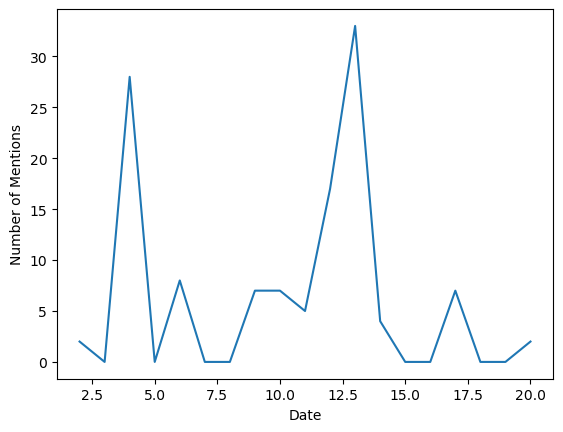

In [7]:
plt.plot(dates_to_save, days_mentions.values())
plt.ylabel('Number of Mentions')
plt.xlabel('Date')
plt.show()

In [21]:

tickers = ["TSLA"]
stock_price = yf.download(tickers,  start = "2024-06-02" , end = "2024-06-20")
stock_price = stock_price['Close']

stock_price

stock_price.index.day



[*********************100%%**********************]  1 of 1 completed


Index([3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18], dtype='int32', name='Date')